In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['font.size'] = 16

In [145]:
cpu = [3240e3, 117e3, 22e3, 640e3, 17800, 62900, 5700, 19800, 66000, 68000, 310000]
#gpu = [153e3, 36e3, 2.1e3, 11.1e3, 1790, 295.9, 328.10, 193, 464, 459, 6711]
#gpu = [116.3e3, 14.7e3, 2.1e3, 11.1e3, 1790, 295.9, 328.10, 193, 464, 459, 6711]
# as of 11/7/19
#gpu = [65.798e3, 3.574e3, 548, 11.6e3, 2539, 295, 192.8, 194, 463, 460, 6709]
# as of 11/9/19
#gpu = [55.3e3, 3.98e3, 363, 8.675e3, 1776, 295, 192.8, 194, 463, 460, 4572]
# as of 11/11/19
gpu = [54.4e3, 3.98e3, 363, 8.675e3, 930, 295, 192.8, 194, 463, 460, 4572]
level = [1, 2, 4, 2, 3, 3, 3, 3, 3, 3, 3]
index = ['RK_stage', 'calc_aux', 'bar_emf', 'calc_rhs', 'f_vabs', 'dzv_ak', 'kBuffer', 'dfdxy',
         'dchidxy', 'dgdxy', 'add_nl']

df['6 gpus'] = df['gpu'] / 6
df['42 cpu cores'] = df['cpu'] / 42
df['speed-up'] = df['42 cpu cores'] / df['6 gpus']

,42 cpu cores,6 gpus,speed-up
eRK_standard,909570.00,79513.00,11.44
eRK_stage_4,225480.00,19537.00,11.54
calcaux,29837.00,5086.10,5.87
calFRhs0,165780.00,12599.00,13.16
ccdens,8917.70,782.49,11.40
fldsolve,8951.60,651.09,13.75
bar_emf,2502.50,473.50,5.29
calc_df1,9421.70,3007.40,3.13
h_from_f,7268.30,441.74,16.45
f_vabs,3436.90,933.44,3.68


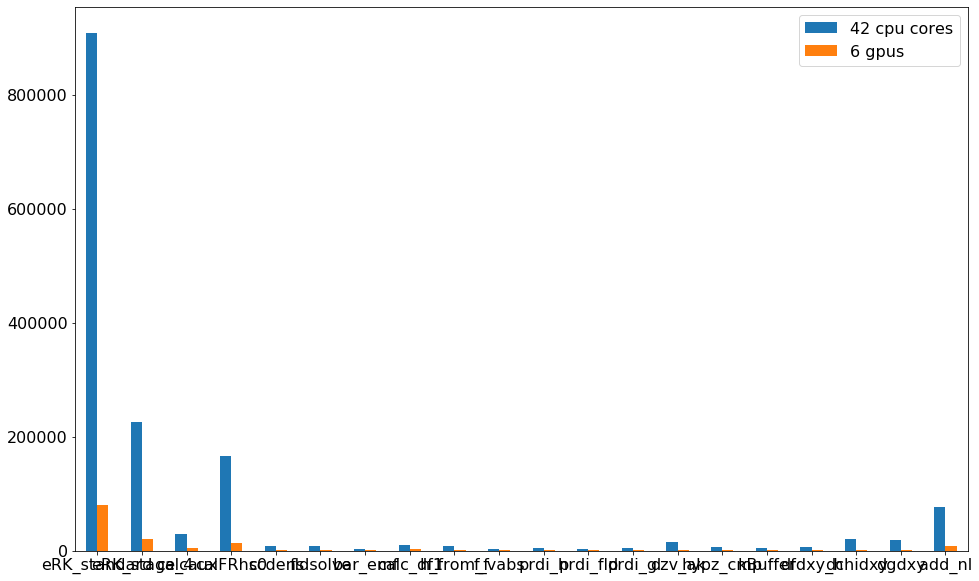

In [148]:
cpu = [909.57e3, 225.48e3, 29.837e3, 165.78e3, 8.9177e3, 8.9516e3, 2.5025e3, 9.4217e3, 7.2683e3,
      3.4369e3, 4.5489e3, 3.1007e3, 4.0394e3, 15.877e3, 6.8204e3, 4.552e3,
      5.4832e3, 19.719e3, 18.438e3, 76.141e3]
gpu = [79.513e3, 19.537e3, 5.0861e3, 12.599e3, 782.49, 651.09, 473.50, 3.0074e3, 441.74,
      933.44, 261.57, 232.65, 261.03, 481.98, 276.21, 318.42,
      321.63, 776.29, 774.22, 7.8463e3]
level = [1, 2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5]
index = ['eRK_standard', 'eRK_stage_4', 'calcaux', 'calFRhs0', 'ccdens', 'fldsolve',
        'bar_emf', 'calc_df1', 'h_from_f',
        'f_vabs', 'prdi_h', 'prdi_fld', 'prdi_g', 'dzv_ak', 'hypz_cmp', 'kBuffer',
        'dfdxy_h', 'dchidxy', 'dgdxy', 'add_nl']
df = pd.DataFrame({'cpu': cpu,
                   'gpu': gpu,
                   'level': level}, index=index)

df['6 gpus'] = df['gpu']
df['42 cpu cores'] = df['cpu']
df['speed-up'] = df['42 cpu cores'] / df['6 gpus']

ax = plt.figure(figsize=(16,10))
df.plot.bar(y=['42 cpu cores', '6 gpus'], rot=0, ax=plt.gca())
df[['42 cpu cores', '6 gpus', 'speed-up']].style.format('{:.2f}')

,42 cpu cores,6 gpus,speed-up
eRK_standard,909570.00,79513.00,11.44


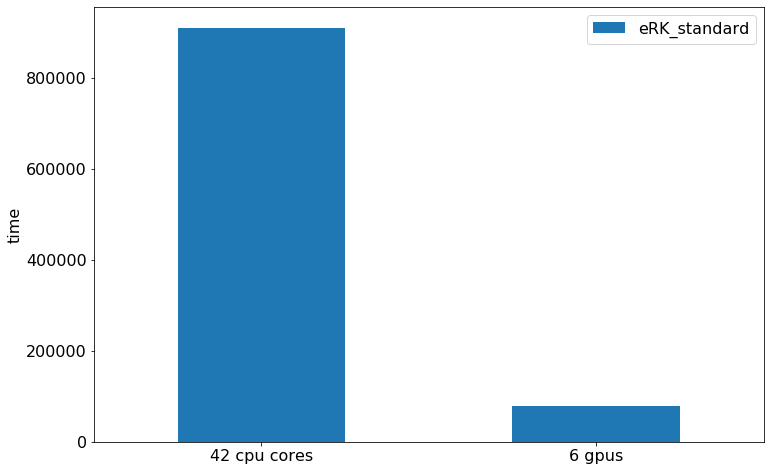

In [146]:
def bar_plot(df, level):
    df2 = df[df.level==level][['42 cpu cores', '6 gpus']].transpose()
    ax = df2.plot.bar(rot=0, stacked=True)
    ax.set_ylabel("time")
    plt.savefig("bar-{}.png".format(level))
    return df[df.level==level][['42 cpu cores', '6 gpus', 'speed-up']].style.format('{:.2f}')

bar_plot(df, 1)

,42 cpu cores,6 gpus,speed-up
calcaux,29837.00,5086.10,5.87
calFRhs0,165780.00,12599.00,13.16


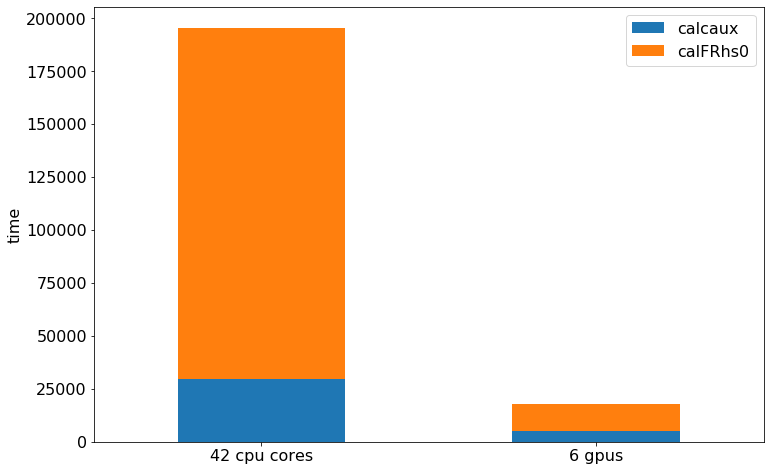

In [147]:
bar_plot(df, 3)

,42 cpu cores,6 gpus,speed-up
ccdens,8917.70,782.49,11.40
fldsolve,8951.60,651.09,13.75
bar_emf,2502.50,473.50,5.29
calc_df1,9421.70,3007.40,3.13
h_from_f,7268.30,441.74,16.45


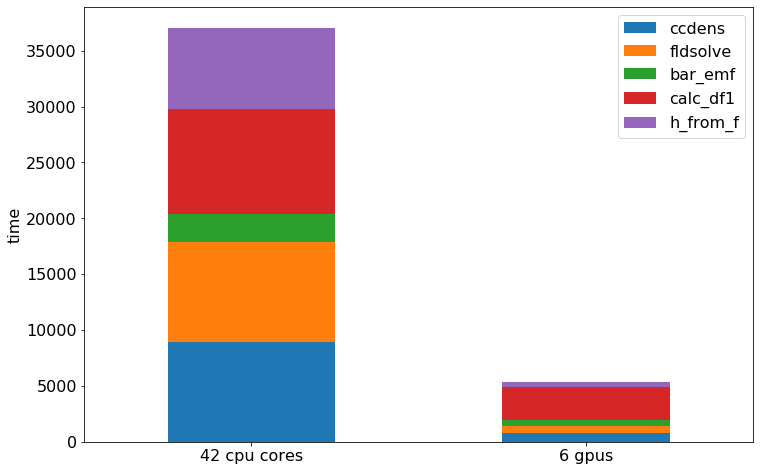

In [131]:
bar_plot(df, 4)

,42 cpu cores,6 gpus,speed-up
f_vabs,3436.90,933.44,3.68
prdi_h,4548.90,261.57,17.39
prdi_fld,3100.70,232.65,13.33
prdi_g,4039.40,261.03,15.47
dzv_ak,15877.00,481.98,32.94
hypz_cmp,6820.40,276.21,24.69
kBuffer,4552.00,318.42,14.30
dfdxy_h,5483.20,321.63,17.05
dchidxy,19719.00,776.29,25.40
dgdxy,18438.00,774.22,23.81


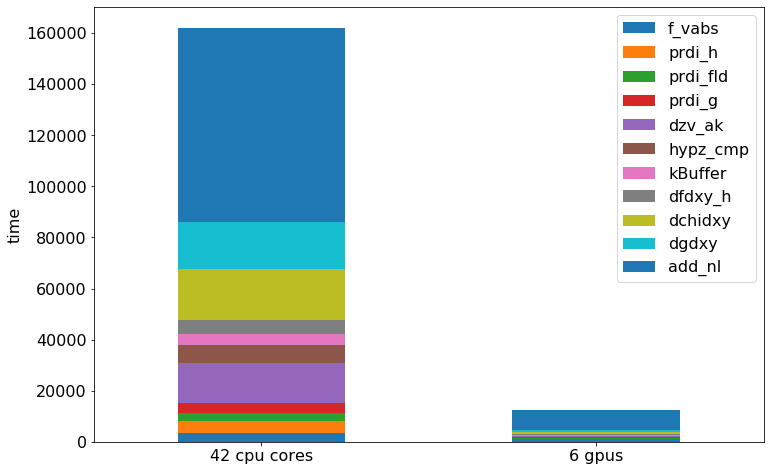

In [142]:
bar_plot(df, 5)

In [107]:
# xyzvws
class Parameters(object):
    def __init__(self, n, n_procs):
        self.n = np.asarray(n)
        self.n_procs = np.asarray(n_procs)
        self.l = self.n / self.n_procs
        
    def size_6d(self):
        return 16 * np.prod(self.l)
    
    def size_exz(self):
        return self.size_6d() / self.l[2] * 2
        
    def size_exv(self):
        return self.size_6d() / self.l[3] * 2
        
    def __repr__(self):
        return ("n = {}\nn_procs = {}\nl = {}\nsize_6d = {} MB"
                .format(self.n, self.n_procs, self.l, self.size_6d() / 1e6))

In [108]:
prm = Parameters([120, 8, 24, 32, 8, 2], [1, 1, 2, 2, 1, 1])

In [110]:
print("prm = {}\nexz = {} MB\nexv = {} MB\n".format(prm, prm.size_exz() / 1e6, prm.size_exv() / 1e6))

prm = n = [120   8  24  32   8   2]
n_procs = [1 1 2 2 1 1]
l = [120.   8.  12.  16.   8.   2.]
size_6d = 47.18592 MB
exz = 7.86432 MB
exv = 5.89824 MB



In [113]:
7.8e6 / 50e9

0.000156

In [101]:
prm4 = Parameters([140, 16, 48, 48, 8, 2], [1, 1, 2, 3, 1, 1])
prm4

n = [140  16  48  48   8   2]
n_procs = [1 1 2 3 1 1]
l = [140.  16.  24.  16.   8.   2.]
size_6d = 220.20096 MB